 # Project Analisis & Segmentasi Pelanggan Kartu Kredit

 **Alur Kerja:** Load -> Clean -> Feature Engineering -> Capping Outlier -> Log Transform -> Scaling -> Clustering -> Visualisasi

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

 ## 1. Load Data & Cleaning

In [8]:
print("--- 1. LOADING DATA ---")
file_path = r"C:\Users\VINCENT\Downloads\cc_general.csv"
df = pd.read_csv(file_path)

print(df.info())

if 'CUST_ID' in df.columns:
    df.drop('CUST_ID', axis=1, inplace=True)

# Mengisi Missing Values dengan Median
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

print(f"Data Loaded: {df.shape[0]} baris, {df.shape[1]} kolom")
print("Missing values berhasil ditangani.")


--- 1. LOADING DATA ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-nu

C:\Users\VINCENT\AppData\Local\Temp\ipykernel_2736\2155657170.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)
C:\Users\VINCENT\AppData\Local\Temp\ipykernel_2736\2155657170.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

## 2. Exploratory Data Analysis (EDA)


--- 2. EXPLORATORY DATA ANALYSIS ---
Statistik Deskriptif:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


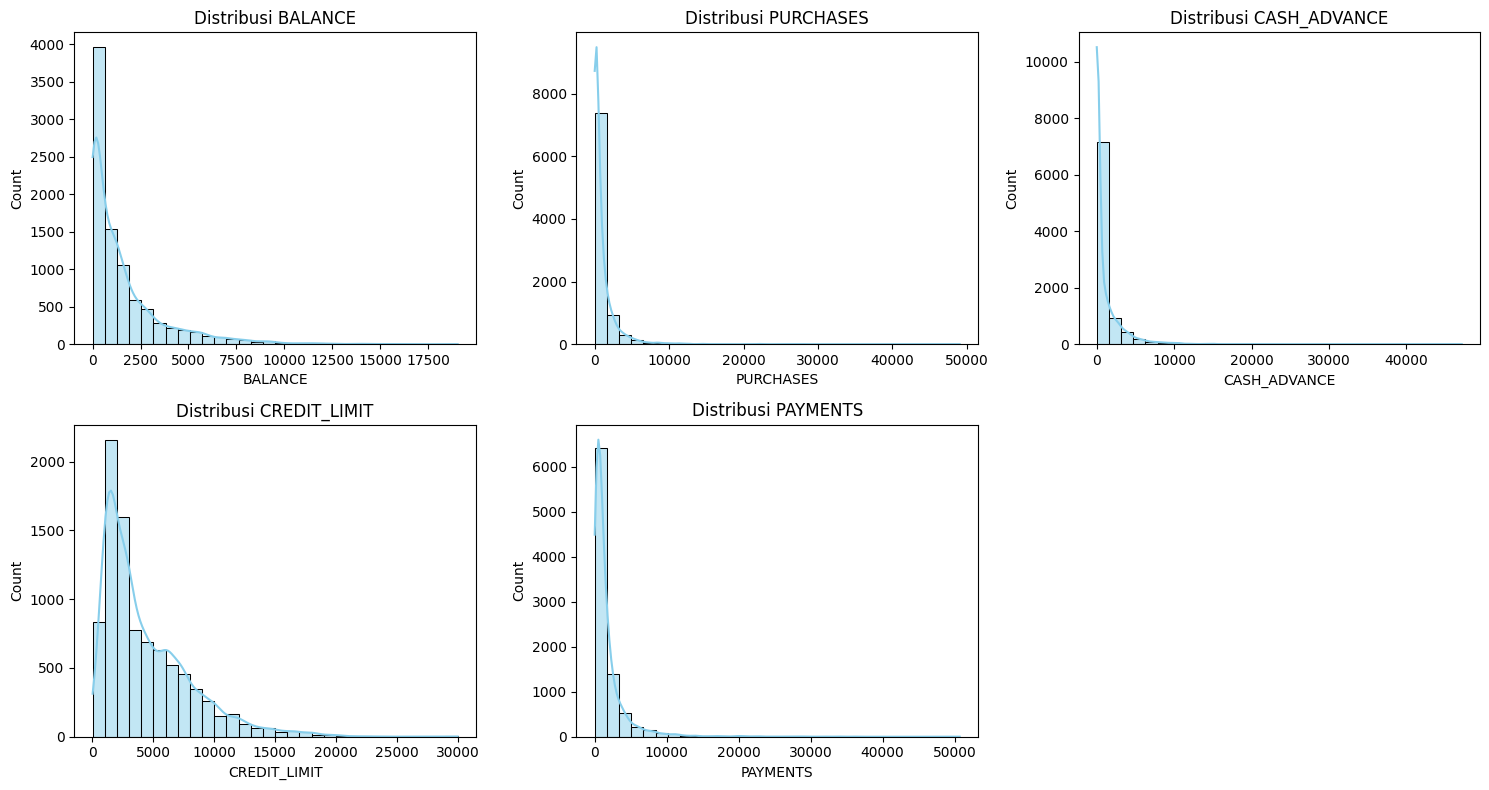

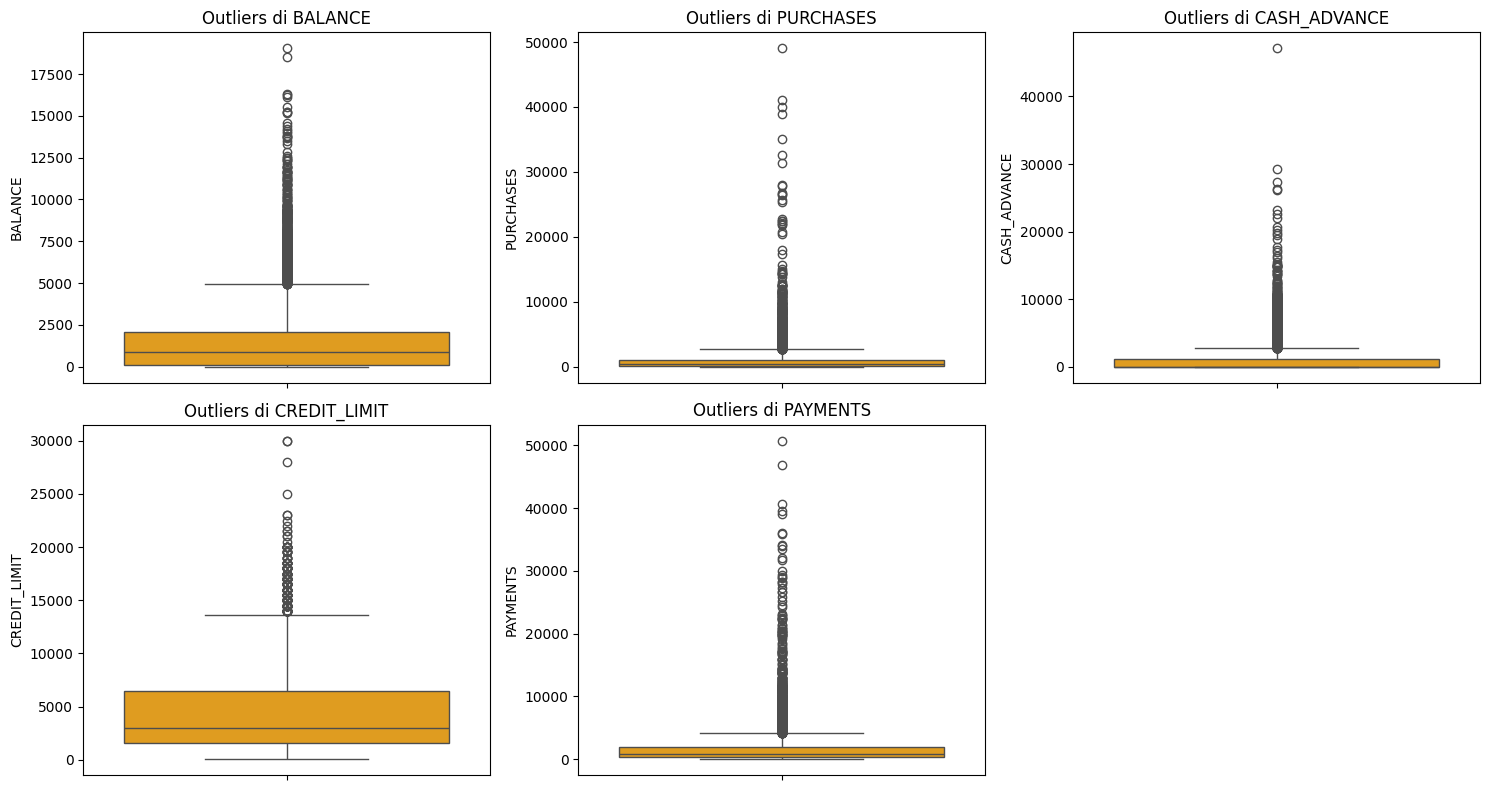

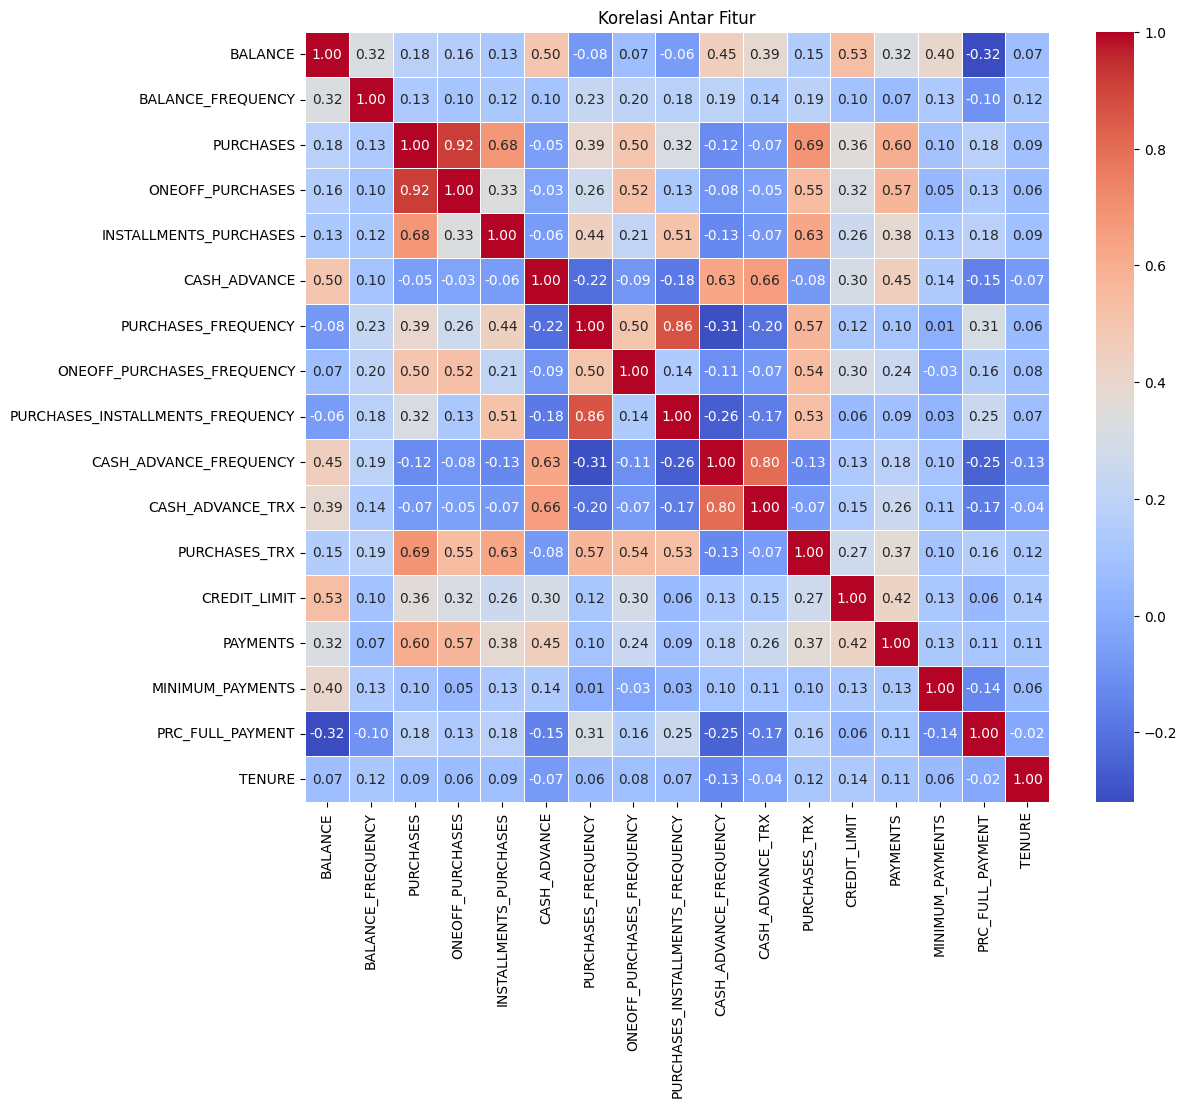

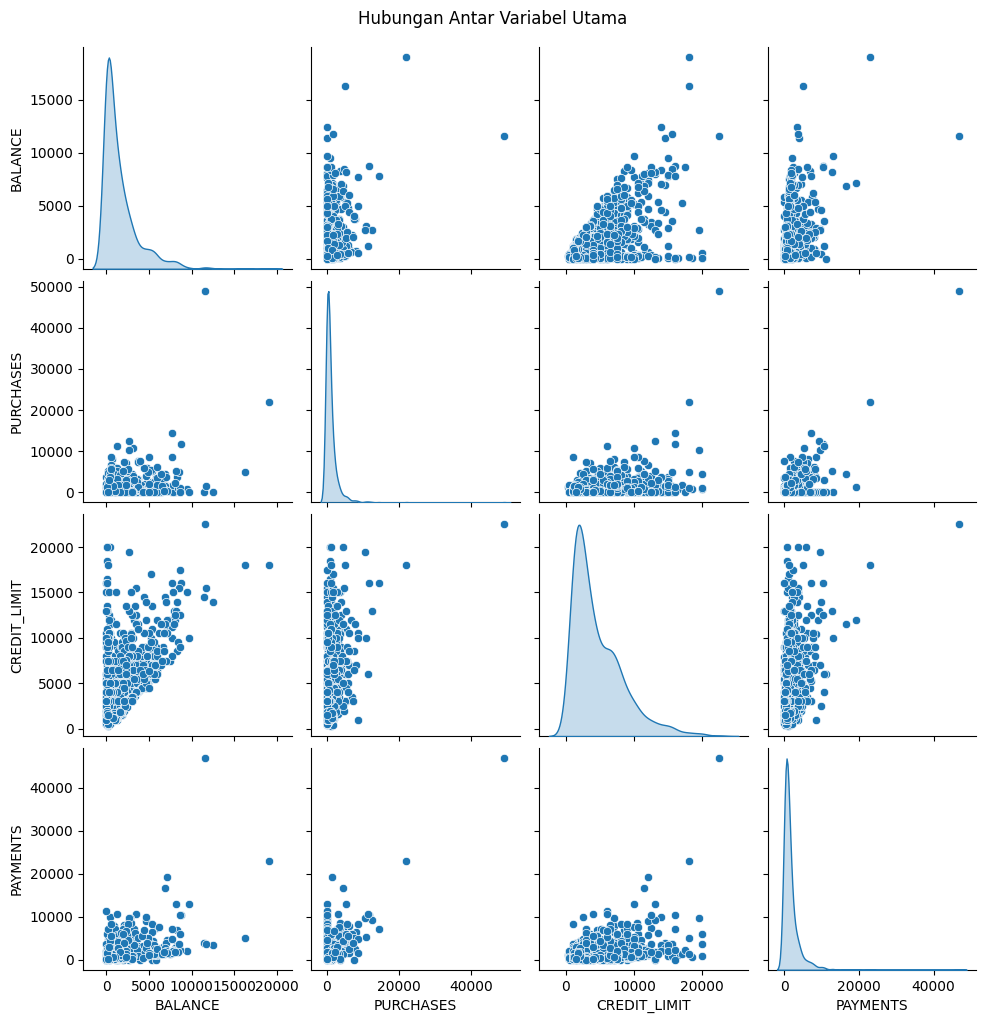

C:\Users\VINCENT\AppData\Local\Temp\ipykernel_2736\2121577157.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TENURE', data=df, palette='viridis')


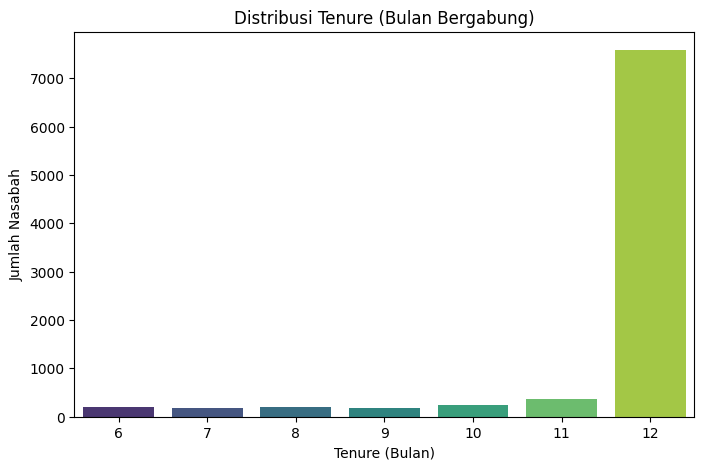

In [9]:
print("\n--- 2. EXPLORATORY DATA ANALYSIS ---")

print("Statistik Deskriptif:")
display(df.describe())

# Distribusi Data (Histograms)
cols_to_plot = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']
plt.figure(figsize=(15, 8))
for i, col in enumerate(cols_to_plot):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

# Outlier Detection (Boxplots)
plt.figure(figsize=(15, 8))
for i, col in enumerate(cols_to_plot):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col], color='orange')
    plt.title(f'Outliers di {col}')
plt.tight_layout()
plt.show()

# Korelasi Antar Fitur (Heatmap)
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Korelasi Antar Fitur')
plt.show()

# Hubungan Antar Variabel (Pairplot - Sampel)
sns.pairplot(df[['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS']].sample(1000), diag_kind='kde')
plt.suptitle('Hubungan Antar Variabel Utama', y=1.02)
plt.show()

# F. Analisis Tenure
plt.figure(figsize=(8, 5))
sns.countplot(x='TENURE', data=df, palette='viridis')
plt.title('Distribusi Tenure (Bulan Bergabung)')
plt.xlabel('Tenure (Bulan)')
plt.ylabel('Jumlah Nasabah')
plt.show()


 ## 3. Feature Engineering

 Menambahkan fitur baru agar analisis lebih tajam (Improvement dari kritik).

In [10]:
print("\n--- 2. FEATURE ENGINEERING ---")

# Rata-rata belanja per bulan
df['Monthly_Avg_Purchase'] = df['PURCHASES'] / df['TENURE']

# Rata-rata tarik tunai per bulan
df['Monthly_Cash_Advance'] = df['CASH_ADVANCE'] / df['TENURE']

# Rasio Pemakaian Limit (Balance / Credit Limit)
df['Limit_Usage'] = df.apply(lambda x: x['BALANCE'] / x['CREDIT_LIMIT'] if x['CREDIT_LIMIT'] > 0 else 0, axis=1)

# Rasio Pembayaran terhadap Minimum Payment
df['Payment_Min_Ratio'] = df.apply(lambda x: x['PAYMENTS'] / x['MINIMUM_PAYMENTS'] if x['MINIMUM_PAYMENTS'] > 0 else 0, axis=1)

print("Fitur baru ditambahkan: Monthly_Avg_Purchase, Limit_Usage, dll.")



--- 2. FEATURE ENGINEERING ---
Fitur baru ditambahkan: Monthly_Avg_Purchase, Limit_Usage, dll.


 ## 3. Outlier Handling & Transformation

 Kita lakukan Capping (95%) lalu Log Transform.

In [11]:
print("\n--- 3. DATA PREPROCESSING (Capping & Log) ---")

# Simpan nama kolom yang akan diproses
cols_to_process = df.columns

# Capping Outlier (Winsorization)
df_capped = df.copy()
for col in cols_to_process:
    upper_limit = df[col].quantile(0.95)
    df_capped[col] = np.where(df_capped[col] > upper_limit, upper_limit, df_capped[col])

# Log Transformation
df_log = np.log1p(df_capped)

# Standardization (Scaling)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_log)

print("Data berhasil di-Capping (95%), di-Log Transform, dan di-Scaling.")



--- 3. DATA PREPROCESSING (Capping & Log) ---
Data berhasil di-Capping (95%), di-Log Transform, dan di-Scaling.


 ## 4. Mencari Jumlah Cluster Optimal

 Menggunakan Elbow Method dan Silhouette Score.


--- 4. MENCARI K TERBAIK ---


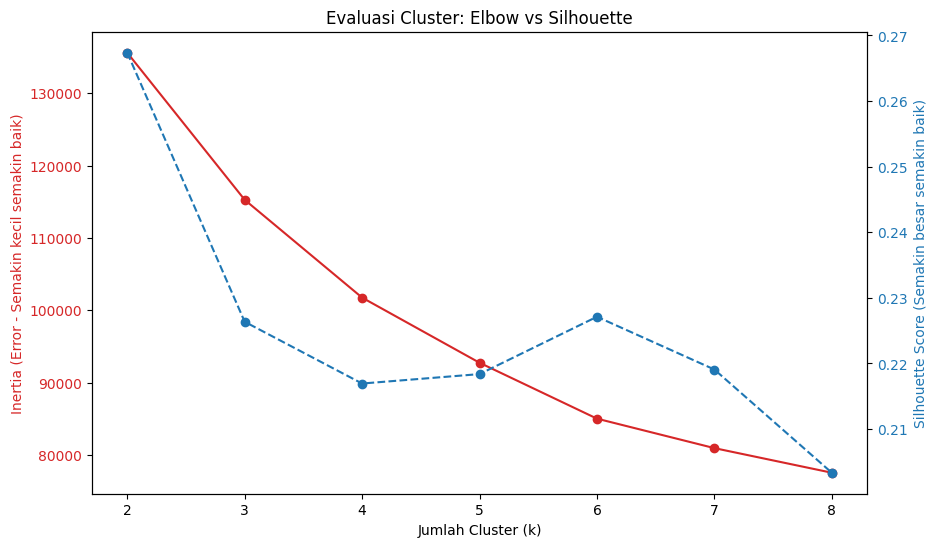

Rekomendasi jumlah cluster optimal: k = 2


In [12]:
print("\n--- 4. MENCARI K TERBAIK ---")

inertia = []
silhouette_scores = []
k_range = range(2, 9)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# Visualisasi Elbow & Silhouette
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Jumlah Cluster (k)')
ax1.set_ylabel('Inertia (Error - Semakin kecil semakin baik)', color=color)
ax1.plot(k_range, inertia, 'o-', color=color, label='Inertia')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Silhouette Score (Semakin besar semakin baik)', color=color)  
ax2.plot(k_range, silhouette_scores, 'o--', color=color, label='Silhouette')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Evaluasi Cluster: Elbow vs Silhouette')
plt.show()

# Menentukan k terbaik berdasarkan silhouette score
best_k = k_range[np.argmax(silhouette_scores)]
print(f"Rekomendasi jumlah cluster optimal: k = {best_k}")


 ## 5. Clustering & Visualisasi (PCA)

 Kita jalankan K-Means dengan K terbaik.


--- 5. CLUSTERING DENGAN K=2 ---


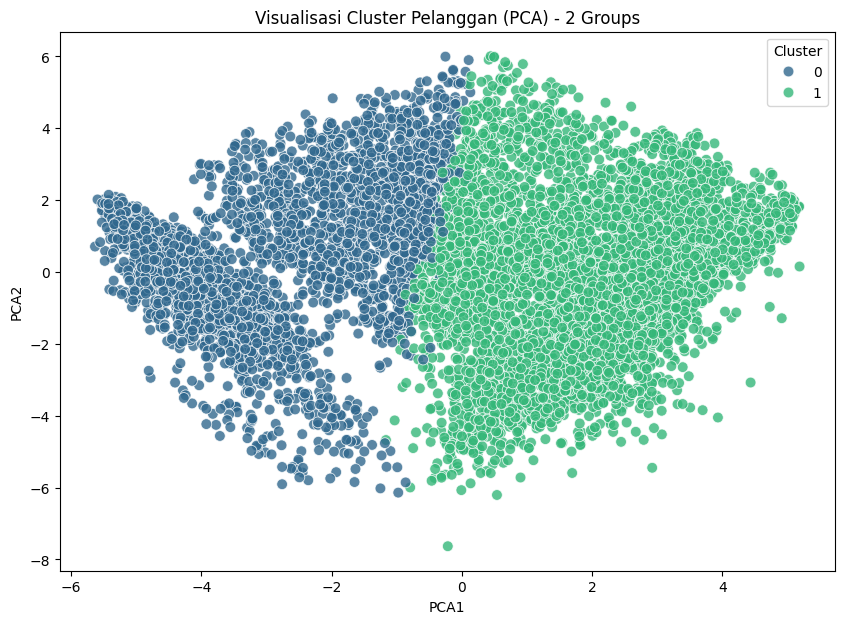

In [13]:
print(f"\n--- 5. CLUSTERING DENGAN K={best_k} ---")

# K-Means 
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(df_scaled)

# tempelkan label cluster ke data Asli (df)
df['Cluster'] = clusters

# 2. Buat DataFrame khusus untuk Snake Plot dari data Scaled
df_scaled_df = pd.DataFrame(df_scaled, columns=df.columns[:-1]) 

# Baru tempelkan cluster ke data scaled
df_scaled_df['Cluster'] = clusters

# Visualisasi PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = clusters

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca, palette='viridis', s=60, alpha=0.8)
plt.title(f'Visualisasi Cluster Pelanggan (PCA) - {best_k} Groups')
plt.show()

 ## 6. Interpretasi Bisnis (Snake Plot)

 Melihat karakteristik setiap cluster.


--- 6. INTERPRETASI BISNIS (SNAKE PLOT) ---


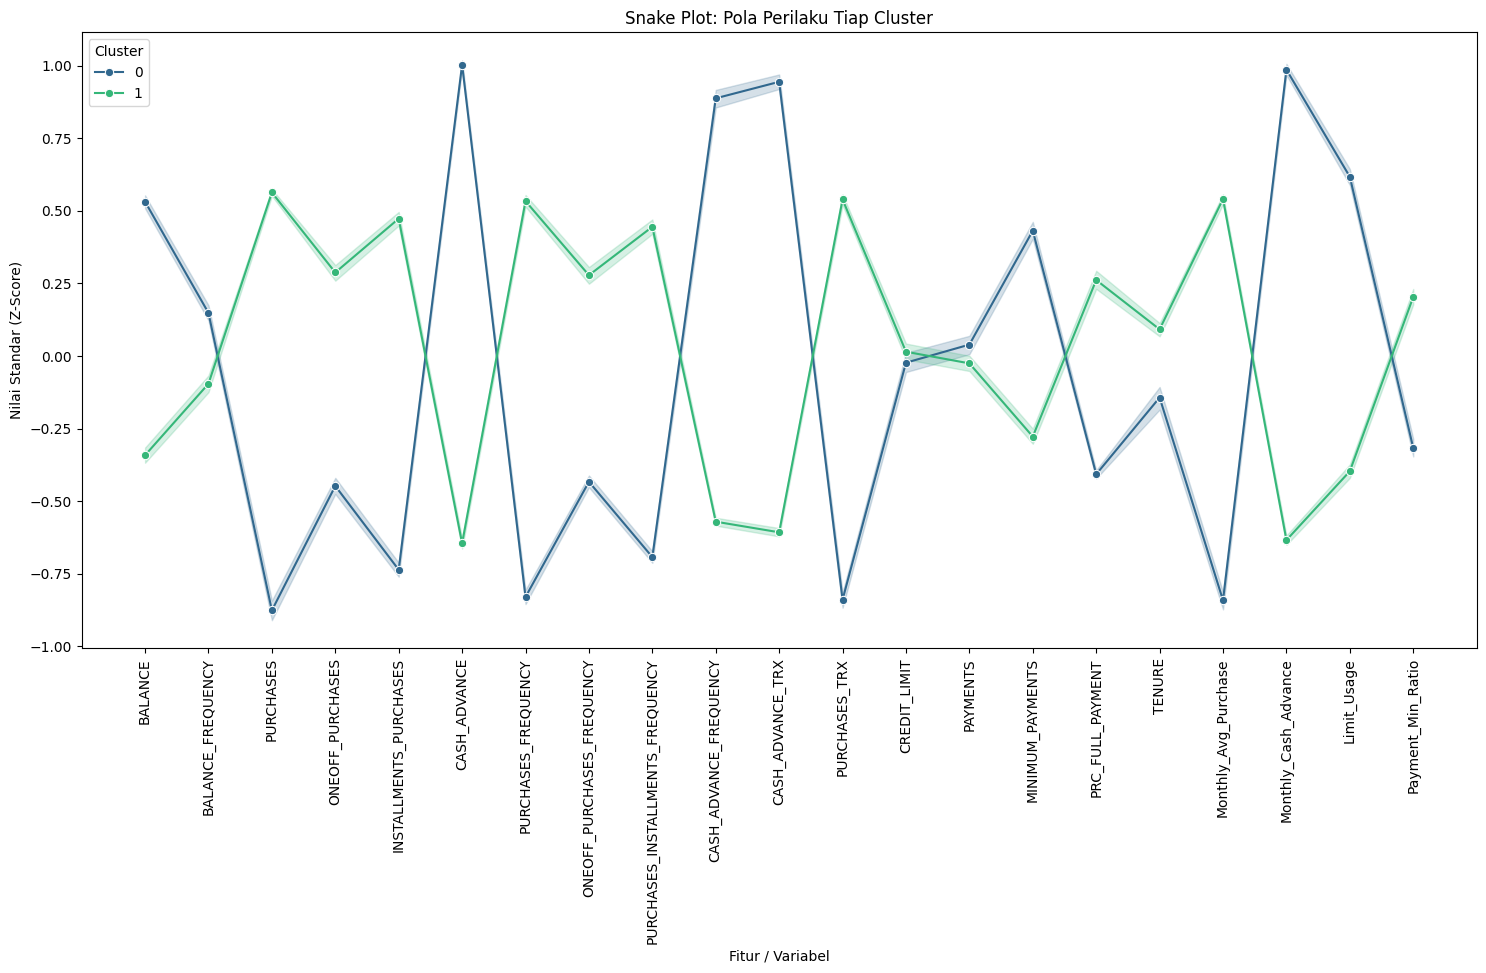

In [14]:
print("\n--- 6. INTERPRETASI BISNIS (SNAKE PLOT) ---")

# Snake Plot
df_melt = pd.melt(df_scaled_df.reset_index(), 
                  id_vars=['Cluster'], 
                  value_vars=df.columns[:-1], 
                  var_name='Fitur', 
                  value_name='Nilai (Scaled)')

plt.figure(figsize=(18, 8))
sns.lineplot(x='Fitur', y='Nilai (Scaled)', hue='Cluster', data=df_melt, palette='viridis', marker="o")
plt.title('Snake Plot: Pola Perilaku Tiap Cluster')
plt.xlabel('Fitur / Variabel')
plt.ylabel('Nilai Standar (Z-Score)')
plt.xticks(rotation=90)
plt.legend(title='Cluster', loc='upper left')
plt.show()


 ## 7. Profiling & Kesimpulan

 Tabel rata-rata untuk memberi nama pada Cluster.

In [15]:
print("\n--- 7. PROFIL CLUSTER & CONTOH DATA ---")

# Kolom statistik rata-rata
key_columns = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'Limit_Usage', 'Payment_Min_Ratio']

# rata-rata per cluster
cluster_summary = df.groupby('Cluster')[key_columns].mean()
cluster_summary['Jumlah_Nasabah'] = df['Cluster'].value_counts()

print("Tabel Rata-rata per Cluster:")
display(cluster_summary)

print("\n--- DETAIL & CONTOH 5 DATA PER CLUSTER ---")

# Loop cluster
for c in range(best_k):
    print(f"\n{'='*40}")
    print(f"CLUSTER {c}")
    print(f"{'='*40}")
    
    if cluster_summary.loc[c, 'PURCHASES'] > df['PURCHASES'].mean():
        char = "Suka Belanja (Spenders)"
    elif cluster_summary.loc[c, 'CASH_ADVANCE'] > df['CASH_ADVANCE'].mean():
        char = "Suka Tarik Tunai (Cash Users)"
    elif cluster_summary.loc[c, 'BALANCE'] < df['BALANCE'].mean():
        char = "Saldo Rendah / Hemat"
    else:
        char = "Tipe Campuran / Moderate"
        
    # Statistik Cluster 
    print(f"Tipe: {char}")
    print(f"Rata-rata Saldo       : ${cluster_summary.loc[c, 'BALANCE']:.2f}")
    print(f"Rata-rata Limit Kredit: ${cluster_summary.loc[c, 'CREDIT_LIMIT']:.2f}")
    
    # Tampilkan 5 Contoh Data 
    print(f"\n Contoh 5 Nasabah di Cluster {c}:")
    
    # Filter data hanya untuk cluster saat ini
    cols_display = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'Limit_Usage']
    sample_data = df[df['Cluster'] == c][cols_display].head(5).reset_index(drop=True)
    
    display(sample_data)


--- 7. PROFIL CLUSTER & CONTOH DATA ---
Tabel Rata-rata per Cluster:


,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,Limit_Usage,Payment_Min_Ratio,Jumlah_Nasabah
Cluster,,,,,,,,
0,2472.182515,241.004872,2189.574349,4384.086583,1822.911503,0.598699,6.603693,3502
1,980.996061,1493.150551,200.625383,4565.116909,1675.440784,0.254013,10.637553,5448



--- DETAIL & CONTOH 5 DATA PER CLUSTER ---

CLUSTER 0
Tipe: Suka Tarik Tunai (Cash Users)
Rata-rata Saldo       : $2472.18
Rata-rata Limit Kredit: $4384.09

 Contoh 5 Nasabah di Cluster 0:


,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,Limit_Usage
0,3202.467416,0.0,6442.945483,7000.0,4103.032597,0.457495
1,1666.670542,1499.0,205.788017,7500.0,0.000000,0.222223
2,817.714335,16.0,0.000000,1200.0,678.334763,0.681429
3,2772.772734,0.0,346.811390,3000.0,805.647974,0.924258
4,6886.213231,1611.7,2301.491267,8000.0,1993.439277,0.860777



CLUSTER 1
Tipe: Suka Belanja (Spenders)
Rata-rata Saldo       : $981.00
Rata-rata Limit Kredit: $4565.12

 Contoh 5 Nasabah di Cluster 1:


,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,Limit_Usage
0,40.900749,95.40,0.0,1000.0,201.802084,0.040901
1,2495.148862,773.17,0.0,7500.0,622.066742,0.332687
2,1809.828751,1333.28,0.0,1800.0,1400.057770,1.005460
3,627.260806,7091.01,0.0,13500.0,6354.314328,0.046464
4,1823.652743,436.20,0.0,2300.0,679.065082,0.792892
